# Fresnel Coefficient

The setup for the experiment is to lock the azimuthal angles of both the incoming and outgoing directions. The outgoing zenith angle can be set fixed to the experiment itself. The zenith of the incoming direction is varied over an inverval of 0 to 45 degrees to obtain the result.

![Fresnel](fresnel_setup.png)

In [275]:
import numpy as np

In [276]:
# Fresnel visualization
m_salinity_factor = 0.00017492711

def friedman_sverdrup_salinity(chlorinity):
    return 0.03 + 1.805 * chlorinity

def fresnel_6s(theta_i, theta_o, phi_i, phi_o, n_real, chlorinity):
    left = np.cos(theta_i) * np.cos(theta_o)
    right = np.sin(theta_i) * np.sin(theta_o) * np.cos(phi_i - phi_o)
    x = left + right    
    omega = np.arccos(x) / 2    
    correction = m_salinity_factor * friedman_sverdrup_salinity(chlorinity)
    n_real += correction
    ior_fraction = 1.000293 / n_real
    omega_prime = np.arcsin(np.sin(omega) * ior_fraction)
    a = omega - omega_prime
    b = omega + omega_prime
    left = (np.sin(a) / np.sin(b)) ** 2
    right = (np.tan(a) / np.tan(b)) ** 2
    return 0.5 * (left + right)


In [277]:
ior_wavelengths = [ 0.200, 0.225, 0.250, 0.275, 0.300, 0.325, 0.345 ,0.375, 0.400, 0.425 ,
                    0.445, 0.475, 0.500, 0.525, 0.550, 0.575, 0.600, 0.625, 0.650, 0.675,
                    0.700, 0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925,
                    0.950, 0.975, 1.000, 1.200, 1.400, 1.600, 1.800, 2.000, 2.200, 2.400, 
                    2.600, 2.650, 2.700, 2.750, 2.800, 2.850, 2.900, 2.950, 3.000, 3.050,
                    3.100, 3.150, 3.200, 3.250, 3.300, 3.350, 3.400, 3.450, 3.500, 3.600,
                    3.700, 3.800, 3.900, 4.000 ]
ior_real_data = [   1.369, 1.373, 1.362, 1.354, 1.349, 1.346, 1.343, 1.341, 1.339, 1.338,
                    1.337, 1.336, 1.335, 1.334, 1.333, 1.333, 1.332, 1.332, 1.331, 1.331,
                    1.331, 1.330, 1.330, 1.330, 1.329, 1.329, 1.329, 1.328, 1.328, 1.328, 
                    1.327, 1.327, 1.327, 1.324, 1.321, 1.317, 1.312, 1.306, 1.296, 1.279,
                    1.242, 1.219, 1.188, 1.157, 1.142, 1.149, 1.201, 1.292, 1.371, 1.426,
                    1.467, 1.483, 1.478, 1.467, 1.450, 1.432, 1.420, 1.410, 1.400, 1.385,
                    1.374, 1.364, 1.357, 1.351 ]

In [278]:
# Obtain test wavelengths and their IOR
wavelengths = [ 0.55, 0.66, 0.87, 1.6  ]

def ior_water(wavelength):
    if wavelength < ior_wavelengths[0] or wavelength > ior_wavelengths[-1]:
        return (1.0, 0.0)
    n_real = np.interp(wavelength, ior_wavelengths, ior_real_data)
    return n_real

wavelengths_ior = [ ior_water(w) for w in wavelengths ]

In [279]:
PI = np.pi

# Chlorinity is often taken to be 19
chlorinity = 19

# Compute the FRESNEL for a fixed azimuth and varying incidence angles
azimuth_max = 45
N = azimuth_max
zenith_vs = np.linspace(0, azimuth_max * PI / 180, N)

azimuth_i = 0.0
azimuth_o = PI
zenith_o = 0

In [280]:
# Actual computation of values
fresnel_result = {}

for i in range(len(wavelengths)):
    wavelength_result = {}
    for zenith_i in zenith_vs:
        wavelength = wavelengths[i]
        n_real = wavelengths_ior[i]
        fresnel_coeff = fresnel_6s(zenith_i, zenith_o, azimuth_i, azimuth_o, n_real, chlorinity)
        wavelength_result[zenith_i] = fresnel_coeff
    fresnel_result[wavelength] = wavelength_result

/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_46560/140227602.py:18: RuntimeWarning: invalid value encountered in scalar divide
  left = (np.sin(a) / np.sin(b)) ** 2
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_46560/140227602.py:19: RuntimeWarning: invalid value encountered in scalar divide
  right = (np.tan(a) / np.tan(b)) ** 2


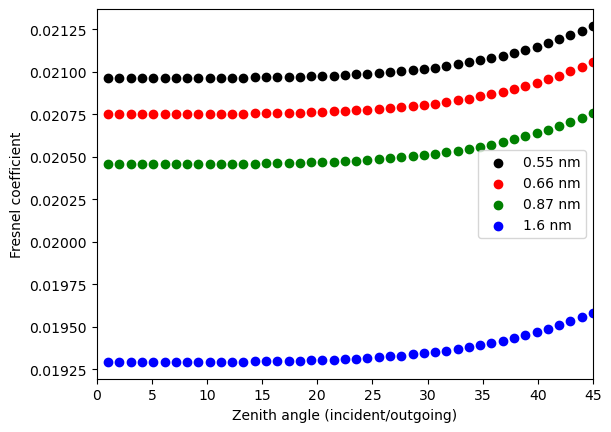

In [281]:
# Visualize the results
import matplotlib.pyplot as plt

# Visualize as black, red, green, blue
colors = ['black', 'red', 'green', 'blue']

for i in range(len(wavelengths)):
    wavelength = wavelengths[i]
    color = colors[i]
    zenith_in_deg = [np.degrees(zenith) for zenith in zenith_vs]

    # Plot as dots
    plt.scatter(zenith_in_deg, [fresnel_result[wavelength][zenith] for zenith in zenith_vs], label=f'{wavelength} nm', color=color)
    
# Visualize range 0 to 45 degrees
plt.xlim([0, 45])

# Add labels
plt.xlabel('Zenith angle (incident/outgoing)')
plt.ylabel('Fresnel coefficient')

# Add legend
plt.legend()

# Show the plot
plt.show()
